In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


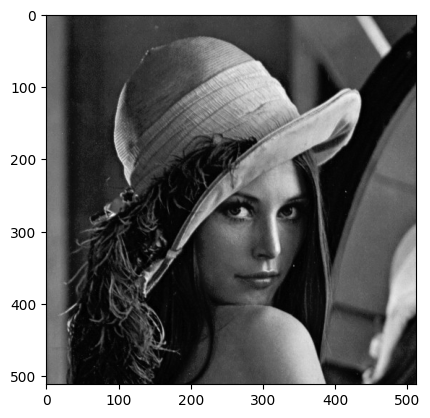

In [3]:
img = np.array(Image.open('./assets/lena_gray.tif').convert('L'))

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [5]:
# Brillo
def brightness_controller(img, brightness):
    floatImg = img.astype(float)
    auxImg = floatImg.copy()
    brImg = auxImg + (brightness - auxImg.mean())

    result = brImg.astype(int)
    result[result<0] = 0
    result[result>255] = 255
    return result

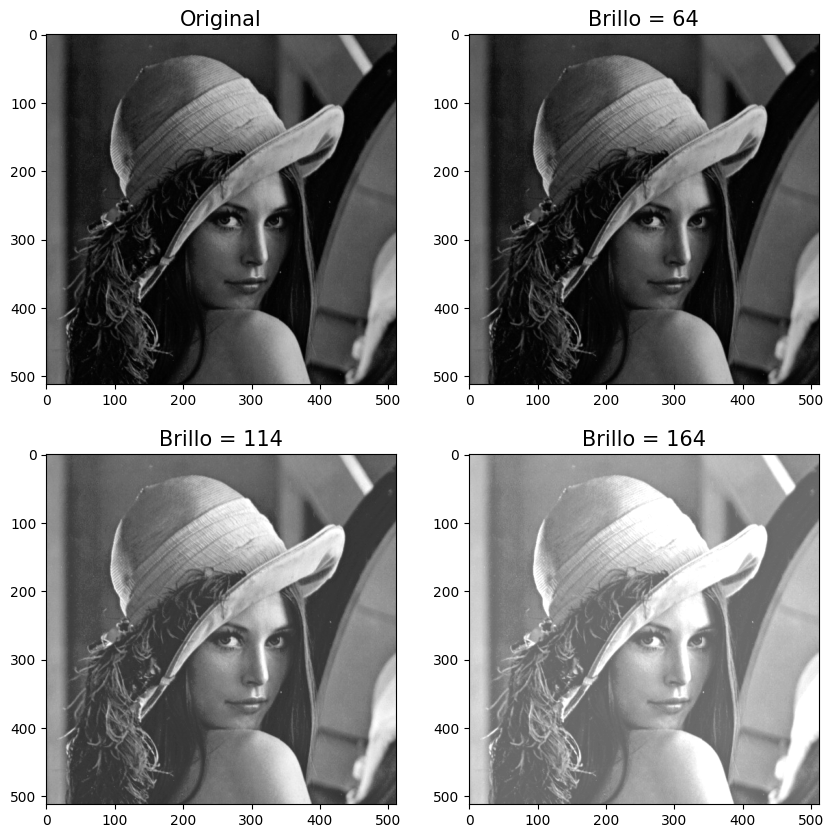

In [10]:
initial_brightness = img.mean()
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax00 = ax[0][0]
ax01 = ax[0][1]
ax10 = ax[1][0]
ax11 = ax[1][1]

ax00.set_title('Original', fontsize=15)
ax00.imshow(img, cmap='gray', vmin=0, vmax=255)

ax01.set_title('Brillo = ' + str(int(initial_brightness)), fontsize=15)
ax01.imshow(brightness_controller(img, initial_brightness), cmap='gray', vmin=0, vmax=255)


ax10.set_title('Brillo = ' + str(int(initial_brightness) + 50), fontsize=15)
ax10.imshow(brightness_controller(img, initial_brightness + 50), cmap='gray', vmin=0, vmax=255)

ax11.set_title('Brillo = ' + str(int(initial_brightness) + 100), fontsize=15)
ax11.imshow(brightness_controller(img, initial_brightness + 100), cmap='gray', vmin=0, vmax=255)

plt.show()

In [11]:
# Contraste
def contrast_controller(img, contrast):
    floatImg = img.astype(float)
    auxImg = floatImg.copy()

    contrastFactor = float( (259*(contrast+255)) / (255 * (259 - contrast)) )
    auxImg = (contrastFactor * (auxImg - 128) ) + 128
    auxImg[auxImg<0] = 0
    auxImg[auxImg>255] = 255

    brImg = auxImg

    result = brImg.astype(int)
    result[result<0] = 0
    result[result>255] = 255
    return result

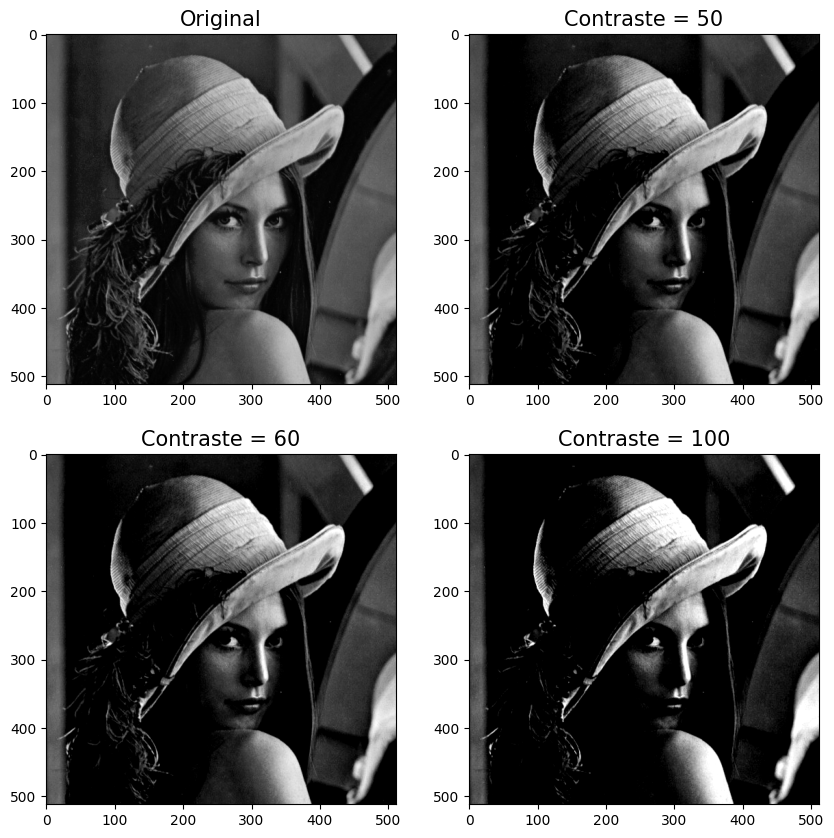

In [14]:
initial_contrast = img.std()
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax00 = ax[0][0]
ax01 = ax[0][1]
ax10 = ax[1][0]
ax11 = ax[1][1]

ax00.set_title('Original', fontsize=15)
ax00.imshow(img, cmap='gray', vmin=0, vmax=255)

ax01.set_title('Contraste = ' + str(int(initial_contrast)), fontsize=15)
ax01.imshow(contrast_controller(img, initial_contrast), cmap='gray', vmin=0, vmax=255)


ax10.set_title('Contraste = ' + str(int(initial_contrast) + 10), fontsize=15)
ax10.imshow(contrast_controller(img, initial_contrast + 10), cmap='gray', vmin=0, vmax=255)

ax11.set_title('Contraste = ' + str(int(initial_contrast) + 50), fontsize=15)
ax11.imshow(contrast_controller(img, initial_contrast + 50), cmap='gray', vmin=0, vmax=255)

plt.show()

El brillo modifica la luminosidad total de la imagen, por ejemplo aclarando los colores oscuros y blanqueando los claros, mientras que el contraste ajusta la diferencia entre los colores más claros y los más oscuros.